# Import Libraries & Datasets

In [1]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')
print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


## Create X and y for 1 Feature
### Notes: 
### y should be a 1D array
### X should be a 2D array

In [2]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape)
print(y.shape)

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

(4546, 1)
(4546,)
[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


# Plotting the Data

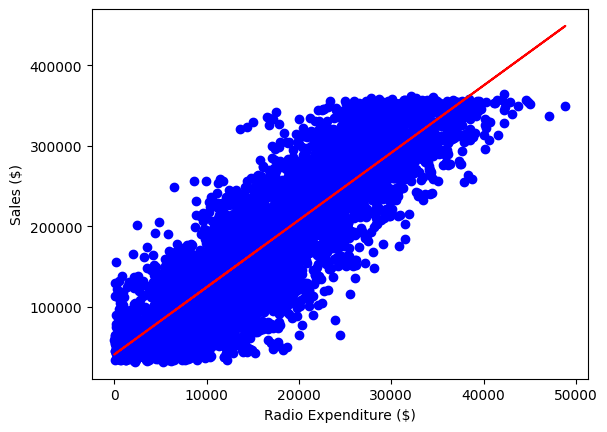

In [3]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

# Create X and y for all Features

In [4]:
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}".format(y_pred[:2]))
print("Actual Values: {}".format(y_test[:2]))

Predictions: [53176.66154234 70996.19873235]
Actual Values: [55261.28 67574.9 ]


# Evaluating the Model

In [5]:
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001015


# Cross Validation using Folds
- The basic idea behind cross-validation is to divide the dataset into multiple subsets or "folds," train the model on some of these folds, and evaluate it on the remaining fold(s). This process is repeated multiple times, with different subsets used for training and testing in each iteration. The results from these iterations are then averaged to obtain a more robust evaluation of the model's performance.

In [6]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]
0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


# Regularization
Make predictions less sensitive to training data

### Ridge Regression
- Ridge regression can improve predictions made from new data by penalizing large coefficients & make the predictions less sensitive to the training data (Reduce variance of the model and increase bias in the same time) or (Reduce overfitting)
- alpha is a hyperparameter that controls the model complexity (0 to infinity)
- alpha = 0 is equivalent to linear regression
- alpha = infinity is equivalent to a constant prediction & can lead to underfitting

In [7]:
# Import Ridge
from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)

    # Fit the data
    ridge.fit(X_train, y_train)

    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


## Lasso Regression
- Same as Ridge Regression but (alpha*|slope|) instead of (alpha*slope^2)
- Lasso can **select important features** of a dataset
- Shrinks the coefficients of less important features to 0
- Features not shrunk to 0 are selected by the model

[ 3.56289375e+00  3.07776096e-03 -2.86451291e-02]


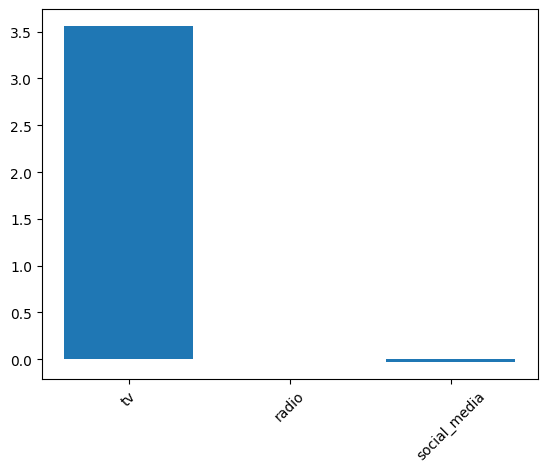

In [8]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
sales_columns = sales_df.drop(["sales", "influencer"], axis=1).columns
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()